 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#Set the file Paths

whale_data = Path("whale_returns.csv")
algo_data = Path("algo_returns.csv")
sp_data = Path("sp_tsx_history.csv")

In [3]:
# Read in whale returns, display sample data

whale_df = pd.read_csv(whale_data)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Set date format, set date as index, drop extra date column, display sample data

whale_df["Date"] = pd.to_datetime(whale_df["Date"])
whale_df.set_index(whale_df["Date"], inplace=True)
whale_df.drop('Date', inplace=True, axis=1)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls

whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Read in algorithmic returns data

algo_df = pd.read_csv(algo_data)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
#Set date format, set date as index, drop extra date column, display sample data

algo_df["Date"] = pd.to_datetime(algo_df["Date"])
algo_df.set_index(algo_df["Date"], inplace=True)
algo_df.drop('Date', inplace=True, axis=1)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Read in S&P TSX 60 Closing Prices
sp_df = pd.read_csv(sp_data)
sp_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [12]:
#Set date format, set date as index, drop extra date column, display sample data

sp_df["Date"] = pd.to_datetime(sp_df["Date"])
sp_df.set_index(sp_df["Date"], inplace=True)
sp_df.drop('Date', inplace=True, axis=1)
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types - remove $ and , - disply sample data

sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].str.replace(',','')
sp_df.head()

C:\Users\Curtis\AppData\Local\Temp/ipykernel_14632/1865806282.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df['Close'] = sp_df['Close'].str.replace('$','')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [15]:
#Convert close data type from object to float

sp_df["Close"] = sp_df["Close"].astype("float")

In [16]:
# Calculate Daily Returns, display sample data
sp_returns = sp_df.pct_change()
sp_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [17]:
# Drop nulls
sp_returns.dropna(inplace=True)

In [18]:
# Rename `Close` Column to be specific to this portfolio - S&P TSX 60
sp_returns.rename(columns={'Close':'S&P TSX 60'}, inplace = True)
sp_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

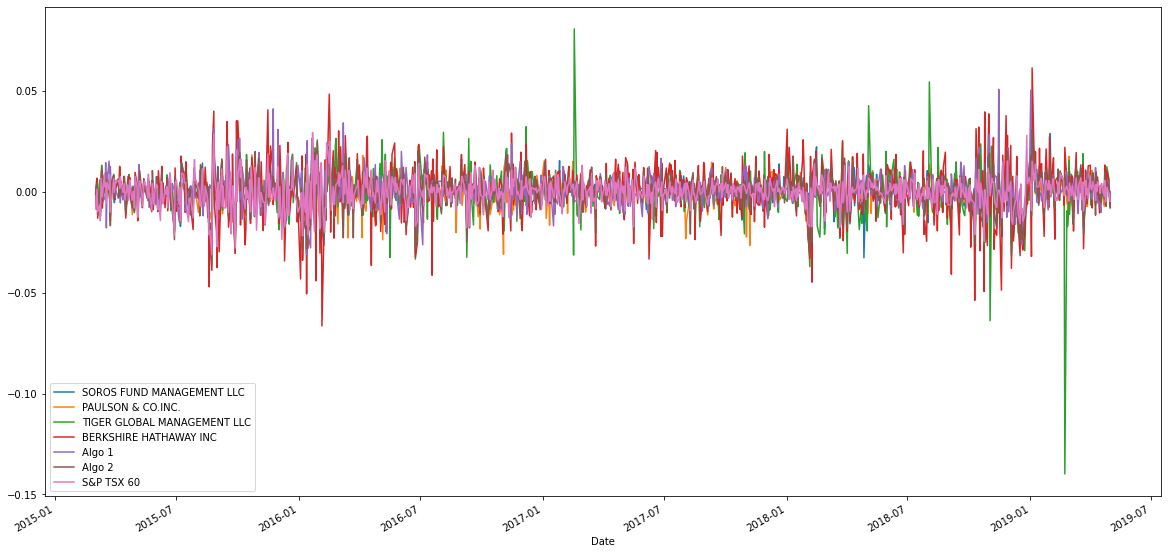

In [20]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

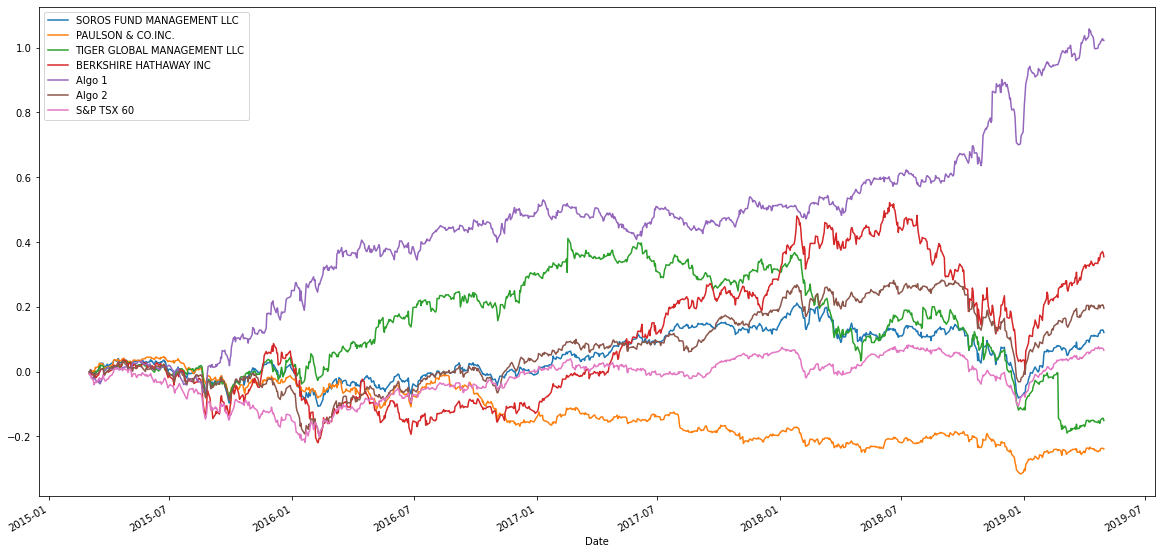

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = ((1 + combined_df).cumprod() - 1)
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

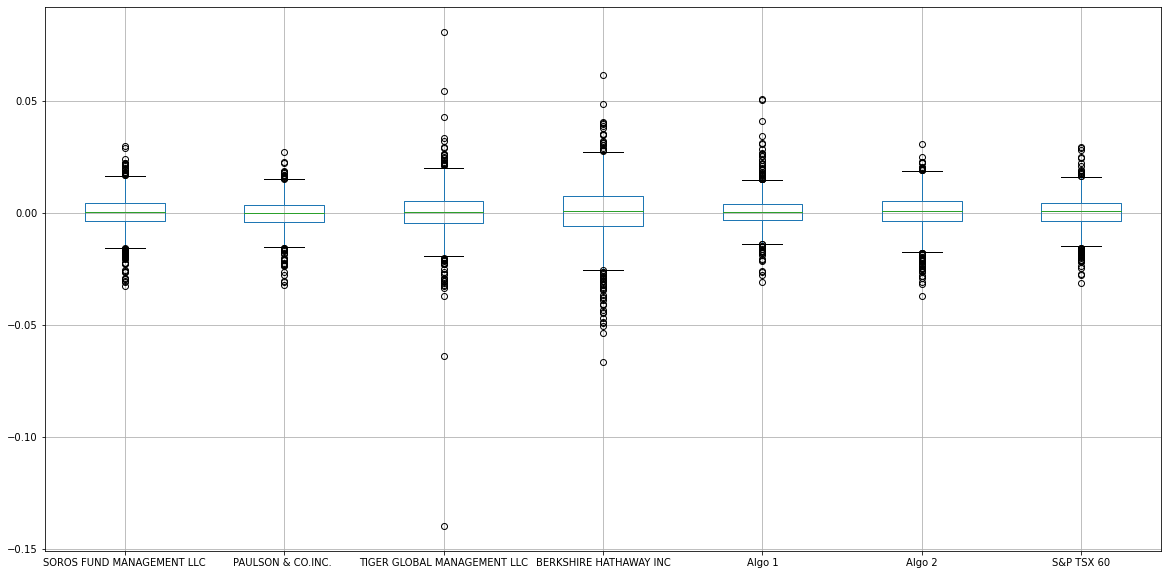

In [61]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = combined_df.std()
standard_deviation

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60 by using loc function and condiontial statements, adding a column to indicate more or less risk than the index - S&P TSX 60, display sample data
df = pd.DataFrame(standard_deviation)
df.columns = ["Standard Deviation"]
baseline = df["Standard Deviation"][-1]

df.loc[df['Standard Deviation'] < baseline, "Risky?"] = "less risk"
df.loc[df['Standard Deviation'] > baseline, "Risky?"]= "more risk"  
df.loc[df['Standard Deviation'] == baseline, "Risky?"]= "baseline"  

df

,Standard Deviation,Risky?
SOROS FUND MANAGEMENT LLC,0.007828,more risk
PAULSON & CO.INC.,0.006982,less risk
TIGER GLOBAL MANAGEMENT LLC,0.010883,more risk
BERKSHIRE HATHAWAY INC,0.012826,more risk
Algo 1,0.007589,more risk
Algo 2,0.008326,more risk
S&P TSX 60,0.007034,baseline


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annual_standard_deviation = standard_deviation * np.sqrt(252)
annual_standard_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

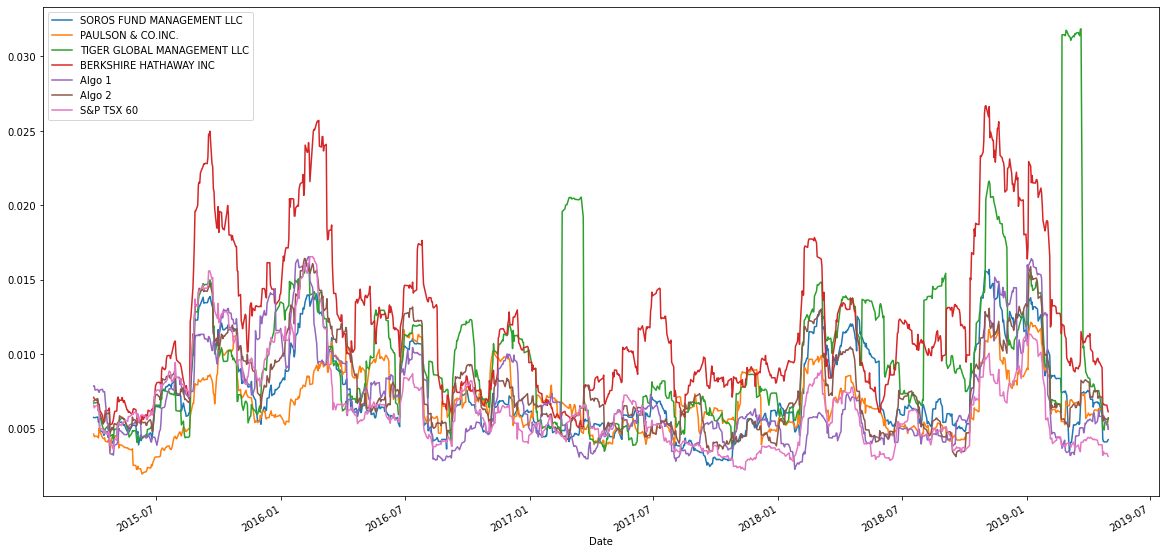

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(20,10))

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
correlation = combined_df.corr()
# Display the correlation matrix
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


Algorithm 2 is the closest portfolio to mimicing the index as its correlation is closest to 1.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
# Calculate covariance of a single portfolio -SOROS Fund Management LLC
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P TSX 60'])
covariance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000014
2019-04-26    0.000014
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000014
Length: 1029, dtype: float64

In [29]:
# Calculate variance of S&P TSX
variance = combined_df['S&P TSX 60'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

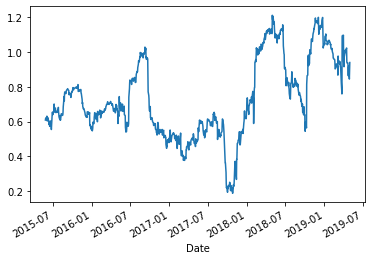

In [30]:
# Computing beta
soros_rolling_beta = covariance/variance
soros_rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [31]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21).std()
ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratio = (combined_df.mean()/combined_df.std()) *np.sqrt(252)
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:>

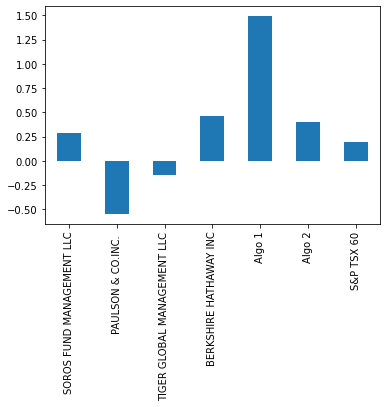

In [33]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Alogrothim 1 outperforms both the market and whale portfolios it also has the highest sharpe ratio meaning it is the best return on a risk adjusted basis as well.
Algorithim 2 outperforms the market and 3 of the whale portoflios (Paulson & Co Inc., Soros Fund Mangement LLC, and Tiger Global Management LLC) it is beat out in terms of performance by Berkshire Hathaway Inc. Algorithim 2 also beats the market and the same 3 portoflios in terms of return on a risk adjusted basis (sharpe ratio) but once again it outperfomred by Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

3 stocks selected:

Canadian Tire Corporation - CTCA
Jack in the box Inc. - JACK
Monster Energy - MNST

In [34]:
# Set file path, read in stock data, drop extra columns, set date format, set date as index, drop extra date column, display sample data
ctca_data = Path("ctca.csv")
ctca_df = pd.read_csv(ctca_data)
ctca_df.drop(columns=["Unnamed: 0", "Open", "High", "Low", "Volume"], inplace=True)
ctca_df["Date"] = pd.to_datetime(ctca_df["Date"])
ctca_df.set_index(ctca_df["Date"], inplace=True)
ctca_df.drop('Date', inplace=True, axis=1)
ctca_df.head()

,Close
Date,
2018-09-13,157.19
2018-09-14,156.71
2018-09-17,157.24
2018-09-18,155.87
2018-09-19,157.56


In [35]:
# Set file path, read in stock data, drop extra columns, set date format, set date as index, drop extra date column, display sample data
jack_data = Path("JACK.csv")
jack_df = pd.read_csv(jack_data)
jack_df.drop(columns=["Unnamed: 0", "Open", "High", "Low", "Volume"], inplace=True)
jack_df["Date"] = pd.to_datetime(jack_df["Date"])
jack_df.set_index(jack_df["Date"], inplace=True)
jack_df.drop('Date', inplace=True, axis=1)
jack_df.head()

,Close
Date,
2018-09-13,84.42
2018-09-14,84.53
2018-09-17,84.00
2018-09-18,83.69
2018-09-19,84.00


In [36]:
# Set file path, read in stock data, drop extra columns, set date format, set date as index, drop extra date column, display sample data
mnst_data = Path("MNST.csv")
mnst_df = pd.read_csv(mnst_data)
mnst_df.drop(columns=["Unnamed: 0", "Open", "High", "Low", "Volume"], inplace=True)
mnst_df["Date"] = pd.to_datetime(mnst_df["Date"])
mnst_df.set_index(mnst_df["Date"], inplace=True)
mnst_df.drop('Date', inplace=True, axis=1)
mnst_df.head()

,Close
Date,
2018-09-13,58.94
2018-09-14,59.53
2018-09-17,59.72
2018-09-18,59.39
2018-09-19,59.32


In [37]:
# Combine all stocks in a single DataFrame using concat function
custom_portfolio_df = pd.concat([ctca_df, jack_df, mnst_df], axis="columns", join="inner")
custom_portfolio_df.columns = ["CTCA", "JACK", "MNST"]
custom_portfolio_df

,CTCA,JACK,MNST
Date,,,
2018-09-13,157.19,84.42,58.94
2018-09-14,156.71,84.53,59.53
2018-09-17,157.24,84.00,59.72
2018-09-18,155.87,83.69,59.39
2018-09-19,157.56,84.00,59.32
...,...,...,...
2021-09-03,191.76,104.89,97.58
2021-09-07,192.37,104.59,95.18
2021-09-08,193.38,104.75,96.84


In [38]:
# Calculate daily returns
daily_returns = custom_portfolio_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,CTCA,JACK,MNST
Date,,,
2018-09-14,-0.003054,0.001303,0.010010
2018-09-17,0.003382,-0.006270,0.003192
2018-09-18,-0.008713,-0.003690,-0.005526
2018-09-19,0.010842,0.003704,-0.001179
2018-09-20,-0.000635,0.002619,0.017869


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-09-14    0.002753
2018-09-17    0.000101
2018-09-18   -0.005976
2018-09-19    0.004456
2018-09-20    0.006618
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame comparing only dates where return infomration is available for all portofolios
# Rename last column Custom Portfolio
combined_df_2 = pd.concat([combined_df, custom_portfolio_returns], axis="columns", join="inner")
combined_df_2.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX 60", "Custom Portfolio"]
combined_df_2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
Date,,,,,,,,
2018-09-14,0.004330,-0.003147,-0.004813,-0.002257,0.000477,0.001237,0.000736,0.002753
2018-09-17,-0.007657,-0.006064,-0.008787,-0.021380,-0.005064,-0.003158,0.004298,0.000101
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,0.007072,-0.005976
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,-0.002848,0.004456
2018-09-20,0.004427,0.006203,0.009847,0.011431,0.011699,0.007725,0.004014,0.006618
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.005057
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.007136
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.002084


<AxesSubplot:xlabel='Date'>

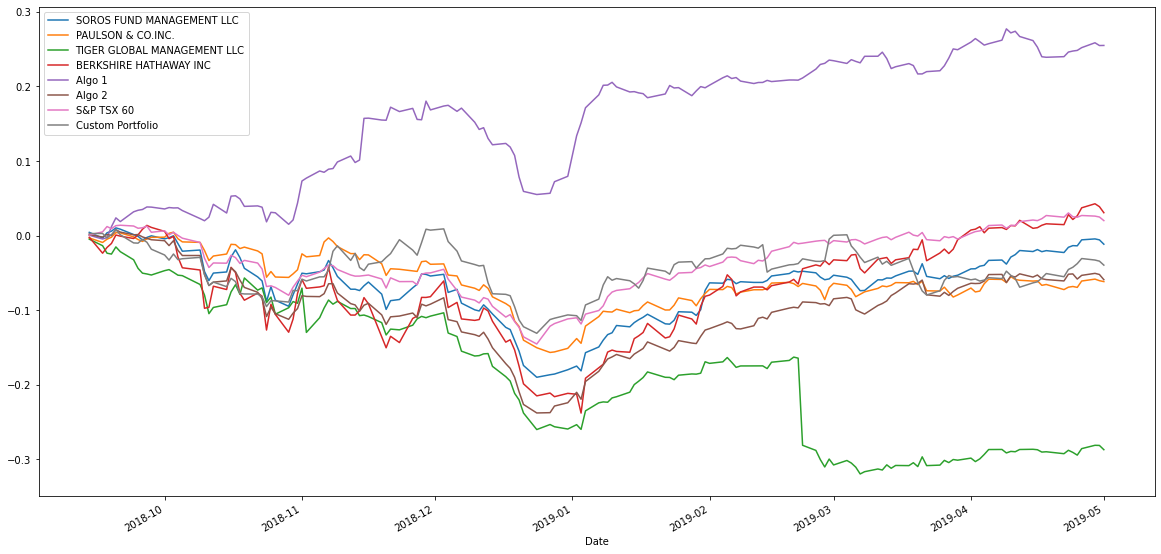

In [60]:
# Calucalte cumultaive returns and plot data
cumulative_returns_2 = ((1 + combined_df_2).cumprod() - 1)
cumulative_returns_2.plot(figsize=(20,10))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
standard_deviation_2 = (combined_df_2.std())*np.sqrt(252)
standard_deviation_2

SOROS FUND MANAGEMENT LLC      0.159961
PAULSON & CO.INC.              0.128163
TIGER GLOBAL MANAGEMENT LLC    0.256747
BERKSHIRE HATHAWAY INC         0.267337
Algo 1                         0.154204
Algo 2                         0.156601
S&P TSX 60                     0.110546
Custom Portfolio               0.161945
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

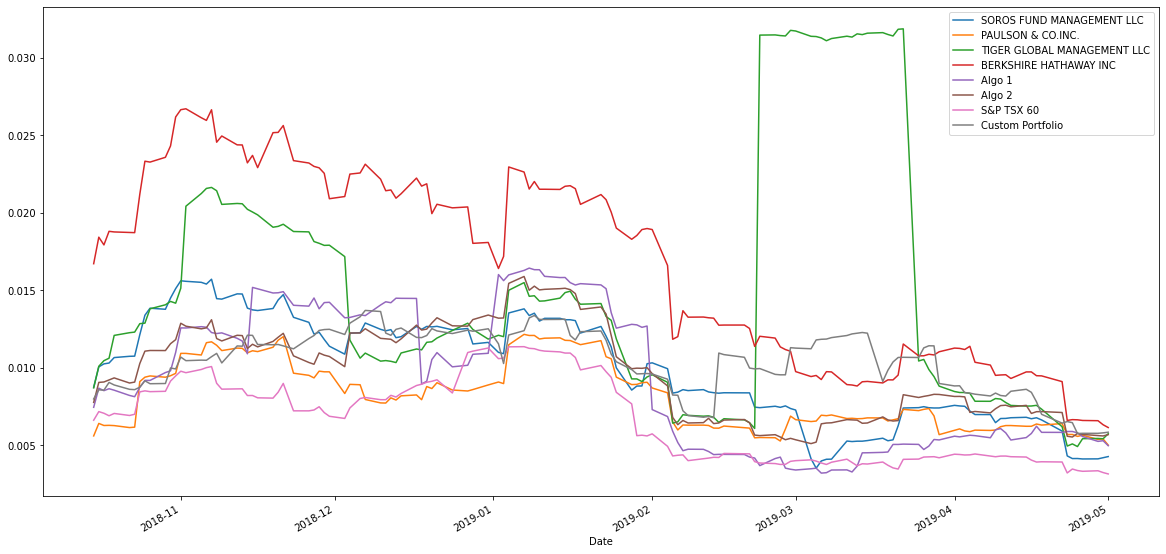

In [52]:
# Calculate rolling standard deviation
rolling_standard_deviation_2 = combined_df_2.rolling(window=21).std()
# Plot rolling standard deviation
rolling_standard_deviation_2.plot(figsize=(20,10))

### Calculate and plot the correlation

In [54]:
# Calculate and plot the correlation
correlation_2 = combined_df_2.corr()
correlation_2.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.800932,0.471623,0.838224,0.358517,0.873226,0.724824,0.440087
PAULSON & CO.INC.,0.800932,1.000000,0.463289,0.679258,0.410752,0.811741,0.620949,0.475471
TIGER GLOBAL MANAGEMENT LLC,0.471623,0.463289,1.000000,0.329197,0.147269,0.389148,0.403599,0.254165
BERKSHIRE HATHAWAY INC,0.838224,0.679258,0.329197,1.000000,0.371755,0.804608,0.690243,0.379909
Algo 1,0.358517,0.410752,0.147269,0.371755,1.000000,0.414016,0.325833,0.259450
Algo 2,0.873226,0.811741,0.389148,0.804608,0.414016,1.000000,0.764248,0.525424
S&P TSX 60,0.724824,0.620949,0.403599,0.690243,0.325833,0.764248,1.000000,0.495144
Custom Portfolio,0.440087,0.475471,0.254165,0.379909,0.259450,0.525424,0.495144,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

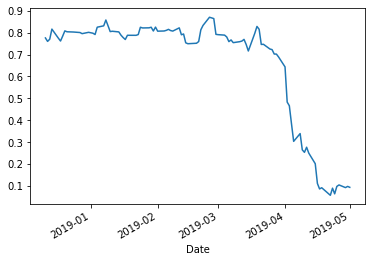

In [56]:
# Calculate and plot Beta
covariance_2 = combined_df_2['Custom Portfolio'].rolling(window=60).cov(combined_df_2['S&P TSX 60'])
variance_2 = combined_df['S&P TSX 60'].rolling(window=60).var()
beta_2 = covariance_2/variance_2
beta_2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratio_2 = (combined_df_2.mean()/combined_df_2.std()) *np.sqrt(252)
annualized_sharpe_ratio_2

SOROS FUND MANAGEMENT LLC     -0.038355
PAULSON & CO.INC.             -0.744041
TIGER GLOBAL MANAGEMENT LLC   -2.006177
BERKSHIRE HATHAWAY INC         0.317005
Algo 1                         2.472216
Algo 2                        -0.554342
S&P TSX 60                     0.347719
Custom Portfolio              -0.325010
dtype: float64

<AxesSubplot:>

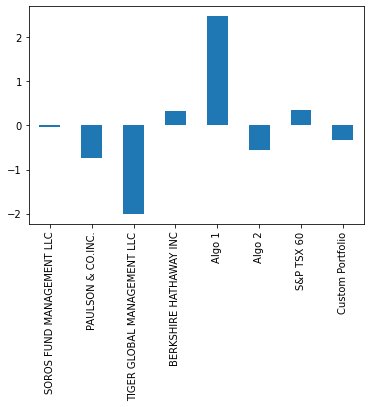

In [58]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio_2.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

Algorithm 1 is once again the clear winner outperfomring all portoflios in terms of return as well as on a risk adjusted basis (higher sharpe ratio). In terms of return my custom portfolio outperformed Algorithm 2 Paulson and co Inc., and Tiger Global Management. My custom portfolio the same 3 portfolios on a risk adjusted basis (higher sharpe ratio). That being said I would argue that the timeframe is not long enough to ahve true comparion of risk and return.